In [1]:
from deta import Deta  # pip install deta
from skimage.io import imread,imshow,imsave
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import database as D

<class 'numpy.ndarray'>
255.0


c:\Users\PIEROL\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


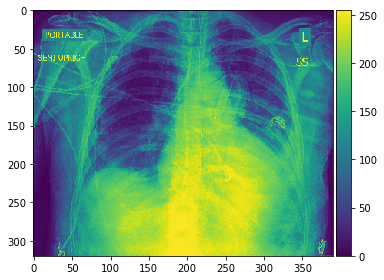

In [7]:
# Prueba Progragama
im = D.get_radiog('id_159350')
print(type(im))
print(np.amax(im))
imshow(im)

In [73]:
DETA_KEY = "e0aeitf6_7Ez5rjjPeN12TfdyAbN34KdzT7Jse29P"

# Initialize with a project key
deta = Deta(DETA_KEY)

# This is how to create/connect a database
db = deta.Base("MetadataPACS")
dv = deta.Drive('DLO_prueba')

# Base de Datos

In [74]:
# FUNCIONES DE LA BASE DE DATOS

def insert_met(id, name, age, te, r, op, neu, rad):
    """Returns the user on a successful user creation, otherwise raises and error"""
    return db.put({"key": id, "nombre": name, "edad": age, 'tipo_estudio' : te, 'razon': r,
    'operario': op, 'm_neumologo': neu, 'm_radiologo': rad})


def get_met(period):
    """If not found, the function will return None"""
    return db.get(period)

# FUNCIONES DEL DRIVE

def upload(imname, file):
    # Subimos una Imagen
    return dv.put(name = imname, path =file)

def get_image(name):
    # Obtenemos una Imagen cuando la pedimos por el nombre
    return dv.get(name)

def list_images():
    # Lista de las Imágenes que guarda
    return dv.list()


# Subir Info

In [92]:
# Ingresamos la metadata
id = 'id_159354'
nombre =  'Amanda Waller'
age = 35
te = 'Rayos X Pecho'
r = 'Esclerosis Multiple'
op = 'Martha Arkham'
neu= 'Clark Kent'
rad = 'Bruce Wayne'

insert_met(id, nombre, age, te, r, op, neu, rad)


{'edad': 35,
 'key': 'id_159354',
 'm_neumologo': 'Clark Kent',
 'm_radiologo': 'Bruce Wayne',
 'nombre': 'Amanda Waller',
 'operario': 'Martha Arkham',
 'razon': 'Esclerosis Multiple',
 'tipo_estudio': 'Rayos X Pecho'}

(320, 390)


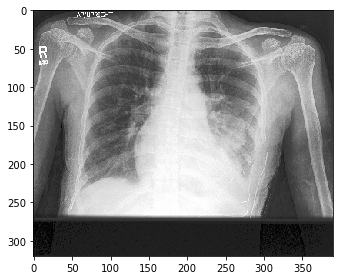

In [93]:
# Subimos la Imagen como txt
mpath = 'C:/Users/PIEROL/Downloads/Database_DLO'
im = imread(mpath + '/DS_DLO/Train/P/impos_1036054.png', as_gray = True)
print(im.shape)

file = 'im.txt'
np.savetxt(file, im, fmt = '%.4e')
upload(id, file)
imshow(im)
os.remove('./im.txt')

# Lectura de Info

In [112]:
# Extraemos todos los nombres
res = db.fetch()
df = pd.DataFrame(res.items)
#display(df)

lst_names = list(df['nombre'])
print(lst_names)

['Nicki Nicole', 'Lionel Messi', 'Federico Salazar', 'Alfonso Ugarte', 'Radamel Falcao', 'Shakira', 'Wade Wilson', 'Amanda Waller']


float64
(320, 357)


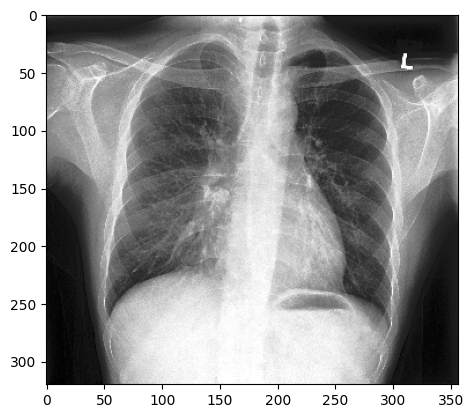

In [15]:
iml = get_image('vic.txt')
content = iml.read().decode("utf-8") 
iml.close()

glst = []
content = content.replace('\r', '')
imlst = content.split('\n')
imlst = imlst[:320]

for lst in imlst:
    l = lst.split(' ')
    l = list(map(float, l))
    glst.append(l)

im = np.array(glst)
print(im.dtype)
print(im.shape)

plt.imshow(im, cmap = 'gray')

# binary_file = open("my_file.txt", "w")
# binary_file.write(content)
# binary_file.close() 

